<a href="https://colab.research.google.com/github/Suhas-S63/Deep_Learning_Lab/blob/main/DL_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images

melanoma-skin-cancer-dataset-of-10000-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
! unzip /content/melanoma-skin-cancer-dataset-of-10000-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: melanoma_cancer_dataset/train/benign/melanoma_643.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_644.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_645.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_646.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_647.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_648.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_649.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_65.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_650.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_651.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_652.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_653.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_654.jpg  
  inflating: melanoma_cancer_dataset/train/benign/mel

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications import VGG16
from keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'melanoma_cancer_dataset/train'
test_dir = 'melanoma_cancer_dataset/test'

train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

test_data = ImageDataGenerator(rescale=1./255)


train_generator = train_data.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_data.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Print class indices
print("Class indices:", train_generator.class_indices)


Found 9605 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Class indices: {'benign': 0, 'malignant': 1}


## Custom CNN Model

In [9]:
# Custom CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## VGG16 model with custom output layers for classification

In [11]:
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg.layers:
    layer.trainable = False

vgg_model_new_top = Sequential()

vgg_model_new_top.add(vgg)

# Add custom top layers
vgg_model_new_top.add(Flatten())
vgg_model_new_top.add(Dense(512, activation='relu'))
vgg_model_new_top.add(Dense(512, activation='relu'))
vgg_model_new_top.add(Dropout(0.5))
vgg_model_new_top.add(Dense(1, activation='sigmoid'))

In [12]:
vgg_model_new_top.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Early stopping code

This is used to stop the training of the model prematurely if the the model accuracy is not increasing after a certain epochs

In [13]:
# early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

In [14]:
# training custom CNN model
custom_history = model.fit_generator(train_generator,
                                            steps_per_epoch=len(train_generator),
                                            epochs=10,
                                            validation_data=validation_generator,
                                            validation_steps=len(validation_generator),
                                            callbacks=[early_stop])


<ipython-input-14-e38d16c7b9a4>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  custom_history = model.fit_generator(train_generator,


Epoch 1/10
301/301 [==============================] - 143s 439ms/step - loss: 0.5255 - accuracy: 0.7312 - val_loss: 0.3097 - val_accuracy: 0.8800
Epoch 2/10
301/301 [==============================] - 121s 403ms/step - loss: 0.3599 - accuracy: 0.8508 - val_loss: 0.2793 - val_accuracy: 0.8830
Epoch 3/10
301/301 [==============================] - 121s 402ms/step - loss: 0.3241 - accuracy: 0.8665 - val_loss: 0.3087 - val_accuracy: 0.8550
Epoch 4/10
301/301 [==============================] - 122s 406ms/step - loss: 0.3192 - accuracy: 0.8669 - val_loss: 0.3171 - val_accuracy: 0.8550
Epoch 5/10
301/301 [==============================] - 124s 411ms/step - loss: 0.3044 - accuracy: 0.8742 - val_loss: 0.2550 - val_accuracy: 0.8910
Epoch 6/10
301/301 [==============================] - 121s 402ms/step - loss: 0.2930 - accuracy: 0.8711 - val_loss: 0.2544 - val_accuracy: 0.8920
Epoch 7/10
301/301 [==============================] - 122s 407ms/step - loss: 0.2894 - accuracy: 0.8780 - val_loss: 0.2452 -

In [15]:
# training VGG16 model with custom top layers
vgg_history = vgg_model_new_top.fit_generator(train_generator,
                                                 steps_per_epoch=len(train_generator),
                                                 epochs=10,
                                                 validation_data=validation_generator,
                                                 validation_steps=len(validation_generator),
                                                 callbacks=[early_stop])

<ipython-input-15-d7230505d80f>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  vgg_history = vgg_model_new_top.fit_generator(train_generator,


Epoch 1/10
301/301 [==============================] - 140s 440ms/step - loss: 0.4270 - accuracy: 0.8224 - val_loss: 0.3267 - val_accuracy: 0.8650
Epoch 2/10
301/301 [==============================] - 130s 433ms/step - loss: 0.3136 - accuracy: 0.8643 - val_loss: 0.2224 - val_accuracy: 0.9090
Epoch 3/10
301/301 [==============================] - 129s 428ms/step - loss: 0.2872 - accuracy: 0.8810 - val_loss: 0.2849 - val_accuracy: 0.8910
Epoch 4/10
301/301 [==============================] - 133s 441ms/step - loss: 0.2729 - accuracy: 0.8850 - val_loss: 0.2594 - val_accuracy: 0.8870
Epoch 5/10
301/301 [==============================] - 133s 442ms/step - loss: 0.2660 - accuracy: 0.8880 - val_loss: 0.2660 - val_accuracy: 0.9090
Epoch 5: early stopping


In [16]:
#  custom model score
custom_scores = model.evaluate_generator(validation_generator, steps=len(validation_generator), verbose=0)
print("Custom Model Test Loss:", custom_scores[0])
print("Custom Model Test Accuracy:", custom_scores[1])

# VGG16 model with custom top layers score
vgg_scores = vgg_model_new_top.evaluate_generator(validation_generator, steps=len(validation_generator), verbose=0)
print("VGG16 Model Test Loss:", vgg_scores[0])
print("VGG16 Model Test Accuracy:", vgg_scores[1])

<ipython-input-16-7a5dbe84c544>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  custom_scores = model.evaluate_generator(validation_generator, steps=len(validation_generator), verbose=0)


Custom Model Test Loss: 0.25461435317993164
Custom Model Test Accuracy: 0.8999999761581421


<ipython-input-16-7a5dbe84c544>:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  vgg_scores = vgg_model_new_top.evaluate_generator(validation_generator, steps=len(validation_generator), verbose=0)


VGG16 Model Test Loss: 0.22240427136421204
VGG16 Model Test Accuracy: 0.9089999794960022


<ipython-input-19-be85565892ab>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(generator, steps=len(generator)).flatten()


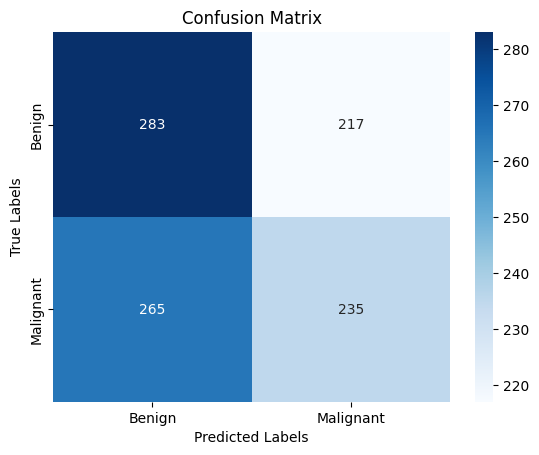

<ipython-input-19-be85565892ab>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(generator, steps=len(generator)).flatten()


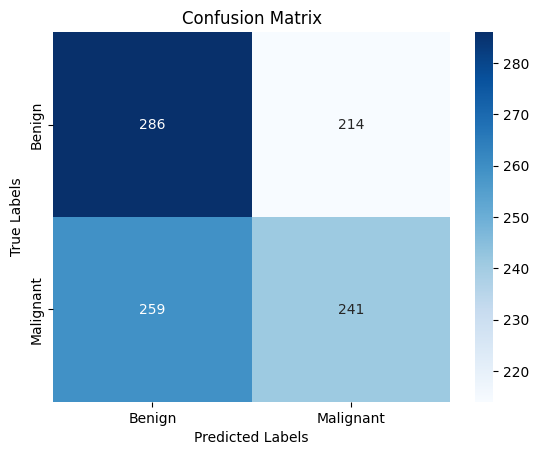

In [19]:
import seaborn as sns

def plot_confusion_matrix(model, generator):
    y_pred = model.predict_generator(generator, steps=len(generator)).flatten()
    y_true = generator.classes

    cm = confusion_matrix(y_true, np.round(y_pred))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

#  confusion matrix for custom model
plot_confusion_matrix(model, validation_generator)

#  confusion matrix for VGG16 model with custom top layers
plot_confusion_matrix(vgg_model_new_top, validation_generator)


## Model Comparison

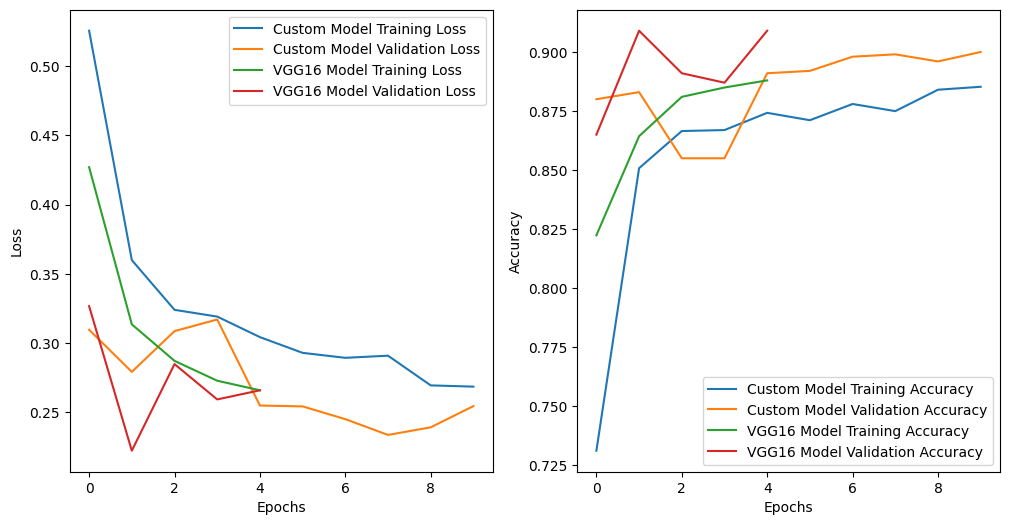

In [20]:
# loss and accuracy curves during training
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(custom_history.history['loss'], label='Custom Model Training Loss')
plt.plot(custom_history.history['val_loss'], label='Custom Model Validation Loss')
plt.plot(vgg_history.history['loss'], label='VGG16 Model Training Loss')
plt.plot(vgg_history.history['val_loss'], label='VGG16 Model Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(custom_history.history['accuracy'], label='Custom Model Training Accuracy')
plt.plot(custom_history.history['val_accuracy'], label='Custom Model Validation Accuracy')
plt.plot(vgg_history.history['accuracy'], label='VGG16 Model Training Accuracy')
plt.plot(vgg_history.history['val_accuracy'], label='VGG16 Model Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
# additional metrics
def calculate_metrics(model, generator):
    y_pred = model.predict_generator(generator, steps=len(generator)).flatten()
    y_true = generator.classes
    y_pred_binary = (y_pred > 0.5).astype(int)

    accuracy = accuracy_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)
    roc_auc = roc_auc_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred_binary)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)
    print("Confusion Matrix:")
    print(confusion)

#  metrics for custom model
print("Custom Model Metrics:")
calculate_metrics(model, validation_generator)

#  metrics for VGG16 model with custom top layers
print("\nVGG16 Model Metrics:")
calculate_metrics(vgg_model_new_top, validation_generator)

Custom Model Metrics:


<ipython-input-21-29ef453c9193>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(generator, steps=len(generator)).flatten()


Accuracy: 0.542
Precision: 0.5464601769911505
Recall: 0.494
F1 Score: 0.51890756302521
ROC AUC Score: 0.53261
Confusion Matrix:
[[295 205]
 [253 247]]

VGG16 Model Metrics:


<ipython-input-21-29ef453c9193>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(generator, steps=len(generator)).flatten()


Accuracy: 0.501
Precision: 0.5010989010989011
Recall: 0.456
F1 Score: 0.4774869109947644
ROC AUC Score: 0.51065
Confusion Matrix:
[[273 227]
 [272 228]]
